# Lesson 4: Data Analysis Process - Case Study 1

Investigating a data set on wine quality,
available [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).
The corresponding publication
> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
> Modeling wine preferences by data mining from physicochemical properties.
> In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
can be found [here](http://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf)
(checked in Jan 2021).

## Import the wine quality datasets

In [1]:
import numpy as np
import pandas as pd

df_red_wine = pd.read_csv('../resources/lesson4/winequality-red.csv', sep=';')
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df_white_wine = pd.read_csv('../resources/lesson4/winequality-white.csv', sep=';')
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


We use pre-defined column names.

In [3]:
class Col:
    """ Column names for the wine quality data set. """
    fixed_acidity = "fixed acidity"
    volatile_acidity = "volatile acidity"
    citric_acid = "citric acid"
    residual_sugar = "residual sugar"
    chlorides = "chlorides"
    free_sulfur_dioxide = "free sulfur dioxide"
    total_sulfur_dioxide = "total sulfur dioxide"
    density = "density"
    pH = "pH"
    sulphates = "sulphates"
    alcohol = "alcohol"
    quality = "quality"
    # additional columns
    color = "color"
    acidity_level = "acidity level"

## Characteristics of the datasets

#### Size of the datasets

In [4]:
df_red_wine.shape

(1599, 12)

In [5]:
df_white_wine.shape

(4898, 12)

#### Missing values in the datasets

In [6]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are no missing values in both datasets.

#### Duplicate rows in the datasets

Number of duplicate rows in the red wine dataset.

In [8]:
sum(df_red_wine.duplicated())

240

Number of duplicate rows in the white wine dataset.

In [9]:
sum(df_white_wine.duplicated())

937

#### Unique values in the datasets

In [10]:
df_red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Unique values of red wine quality.

In [11]:
df_red_wine.nunique()[Col.quality]

6

Unique values of white wine quality.

In [12]:
df_white_wine.nunique()[Col.quality]

7

#### Mean density in the red wine dataset

In [13]:
df_red_wine[Col.density].mean()

0.996746679174484

## Appending data frames

In [14]:
color_red = 'red'
color_white = 'white'

Add a `color` column to both data frames, to later identify the color in the combined data frame.

In [15]:
df_red_wine[Col.color] = color_red
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
df_white_wine[Col.color] = color_white
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Append the data frames.

In [17]:
df_wine = df_red_wine.append(df_white_wine)
df_wine.reset_index(inplace=True)
df_wine.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
df_wine.shape

(6497, 14)

In [19]:
df_wine.nunique()[Col.color]

2

Store the combined data frame.

In [20]:
df_wine.to_csv('../output/winequality_edited.csv', index=False)

## Exploring with visualizations

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

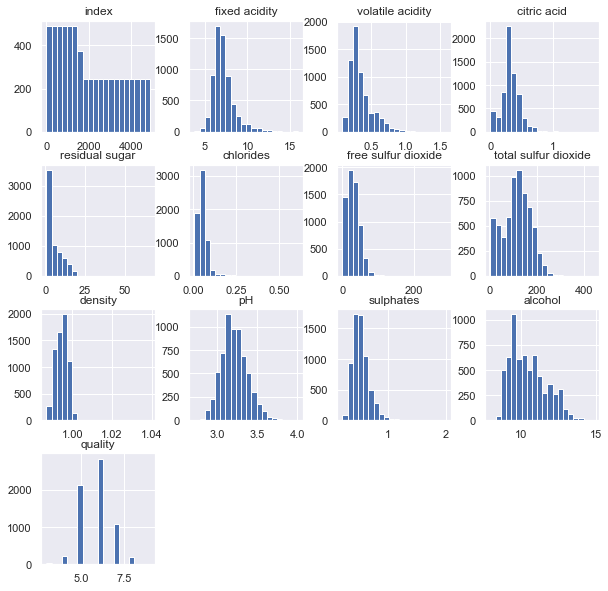

In [22]:
df_wine.hist(bins=20, figsize=(10, 10));

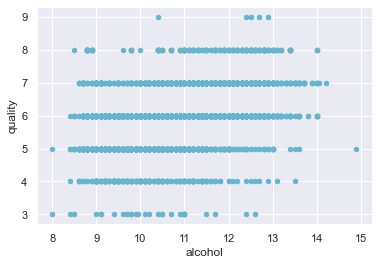

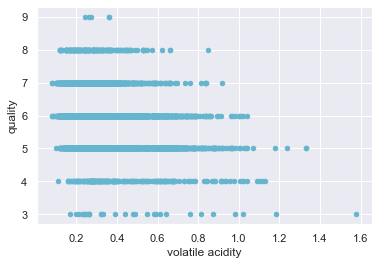

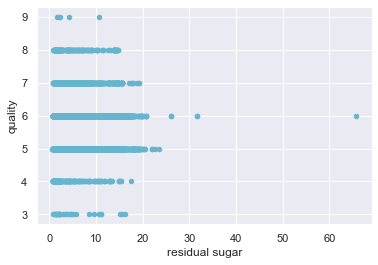

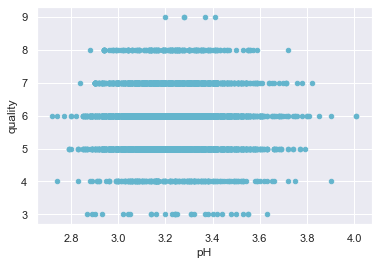

In [23]:
color = 'c'
df_wine.plot(kind='scatter', c=color, x=Col.alcohol, y=Col.quality)
df_wine.plot(kind='scatter', c=color, x=Col.volatile_acidity, y=Col.quality)
df_wine.plot(kind='scatter', c=color, x=Col.residual_sugar, y=Col.quality)
df_wine.plot(kind='scatter', c=color, x=Col.pH, y=Col.quality);

## Drawing conclusion using `groupby`

#### Is a certain type of wine (red/white) associated with higher quality?

In [24]:
df_wine.groupby([Col.color])[Col.quality].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


#### What level of acidity (pH value) receives the highest average rating?

Divide the pH levels into 4 categories and then check,
which of them is associated with the highest mean quality.

In [25]:
phmin, ph25, ph50, ph75, phmax = df_wine[Col.pH].describe()[['min', '25%', '50%', '75%', 'max']]
acidity_level_bin_edges = [phmin, ph25, ph50, ph75, phmax]
acidity_level_bin_edges

[2.72, 3.11, 3.21, 3.32, 4.01]

In [26]:
acidity_level_bin_labels = ['high', 'moderately high', 'medium', 'low']

df_wine[Col.acidity_level] = pd.cut(df_wine[Col.pH],
    bins=acidity_level_bin_edges, labels=acidity_level_bin_labels, include_lowest=True)

In [27]:
df_wine.sort_values(by=Col.pH)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
3499,1900,10.0,0.23,0.27,14.1,0.033,45.0,166.0,0.99880,2.72,0.43,9.7,6,white,high
151,151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,red,high
2813,1214,9.7,0.24,0.45,1.2,0.033,11.0,59.0,0.99260,2.74,0.47,10.8,6,white,high
3761,2162,9.9,0.49,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.4,6,white,high
5361,3762,7.4,0.20,0.35,6.1,0.025,10.0,40.0,0.99244,2.79,0.52,10.9,5,white,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,red,low
45,45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red,low
695,695,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6,red,low
1316,1316,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,low


In [28]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 6497 non-null   int64   
 1   fixed acidity         6497 non-null   float64 
 2   volatile acidity      6497 non-null   float64 
 3   citric acid           6497 non-null   float64 
 4   residual sugar        6497 non-null   float64 
 5   chlorides             6497 non-null   float64 
 6   free sulfur dioxide   6497 non-null   float64 
 7   total sulfur dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6497 non-null   float64 
 10  sulphates             6497 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   int64   
 13  color                 6497 non-null   object  
 14  acidity level         6497 non-null   category
dtypes: c

In [29]:
mean_quality_by_acidity_level = df_wine.groupby(Col.acidity_level)[Col.quality].mean()
mean_quality_by_acidity_level

acidity level
high               5.783469
moderately high    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

In [30]:
print(f"{mean_quality_by_acidity_level.idxmax()} acidity level is associated "
      f"with highest average quality rating, which is {mean_quality_by_acidity_level.max():.4f}." )

low acidity level is associated with highest average quality rating, which is 5.8596.


## Drawing conclusions using query

#### Do wines with higher alcohol level receive better ratings?

Select entries with low and high alcohol.

In [31]:
alcohol_median = df_wine[Col.alcohol].median()

low_alcohol_wines = df_wine[df_wine[Col.alcohol] < alcohol_median]
low_alcohol_wines

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
0,0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,moderately high
2,2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,moderately high
4,4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white,high
6488,4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white,high
6491,4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white,medium
6493,4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,moderately high


In [32]:
high_alcohol_wines = df_wine[df_wine[Col.alcohol] >= alcohol_median]
high_alcohol_wines

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
9,9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,low
11,11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red,low
16,16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,red,medium
31,31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6,red,low
36,36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,4890,6.1,0.340,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,white,high
6490,4891,5.7,0.210,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,white,medium
6492,4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6495,4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,low


Double-check that the groups are a disjoint partitioning of all wine entries.

In [33]:
print(f"Check that the number of entries in low/high alcohol sub-sets is equal to the number of all entries: "
      f"{len(df_wine.index) == len(low_alcohol_wines) + len(high_alcohol_wines)}" )

print(f"Check that the entries in low/high alcohol sub-sets are disjoint: "
      f"{set(low_alcohol_wines.index.values).isdisjoint(set(high_alcohol_wines.index.values))}" )

Check that the number of entries in low/high alcohol sub-sets is equal to the number of all entries: True
Check that the entries in low/high alcohol sub-sets are disjoint: True


Calculate the mean quality for low/high alcohol subsets.

In [34]:
print(f"Wines with low alcohol, mean rating:  {low_alcohol_wines[Col.quality].mean():.4f}")
print(f"Wines with high alcohol, mean rating: {high_alcohol_wines[Col.quality].mean():.4f}")

Wines with low alcohol, mean rating:  5.4759
Wines with high alcohol, mean rating: 6.1461


#### Do sweeter wines receive better ratings?

Select entries with low and high residual sugar.

In [35]:
sugar_median = df_wine[Col.residual_sugar].median()

low_sugar_wines = df_wine[df_wine[Col.residual_sugar] < sugar_median]
low_sugar_wines

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,moderately high
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,moderately high
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,4892,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white,medium
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,high
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,low


In [36]:
high_sugar_wines = df_wine[df_wine[Col.residual_sugar] >= sugar_median]
high_sugar_wines

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
9,9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,red,low
11,11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.50,5,red,low
14,14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.20,5,red,moderately high
15,15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.20,5,red,moderately high
18,18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,4884,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5,white,moderately high
6484,4885,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6,white,moderately high
6485,4886,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.15,7,white,moderately high
6488,4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.40,6,white,high


Double-check that the groups are a disjoint partitioning of all wine entries.

In [37]:
print(f"Check that the number of entries in low/high sigar sub-sets is equal to the number of all entries: "
      f"{len(df_wine.index) == len(low_sugar_wines) + len(high_sugar_wines)}" )

print(f"Check that the entries in low/high sugar sub-sets are disjoint: "
      f"{set(low_sugar_wines.index.values).isdisjoint(set(high_sugar_wines.index.values))}" )

Check that the number of entries in low/high sigar sub-sets is equal to the number of all entries: True
Check that the entries in low/high sugar sub-sets are disjoint: True


Calculate the mean quality for low/high sugar subsets.

In [38]:
mean_quality_low_sugar = low_sugar_wines[Col.quality].mean()
mean_quality_high_sugar = high_sugar_wines[Col.quality].mean()

print(f"Wines with low sugar, mean rating:  {mean_quality_low_sugar:.4f}")
print(f"Wines with high sugar, mean rating: {mean_quality_high_sugar:.4f}")

Wines with low sugar, mean rating:  5.8088
Wines with high sugar, mean rating: 5.8278


## Plotting Type & Quality with `DataFrame.plot`

Plot the average wine quality rating by color.

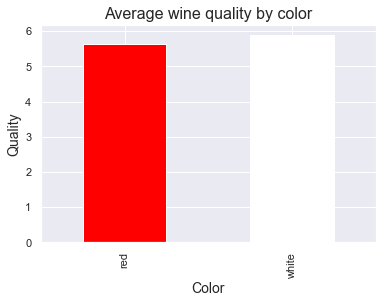

In [39]:
title_font_size = 16
label_font_size = 14

wine_colors = [color_red, color_white]
df_wine.groupby([Col.color])[Col.quality].mean().plot(kind='bar', color=wine_colors)
plt.title('Average wine quality by color', fontsize=title_font_size)
plt.xlabel('Color', fontsize=label_font_size)
plt.ylabel('Quality', fontsize=label_font_size);

Plot the counts of quality ratings by quality and color.

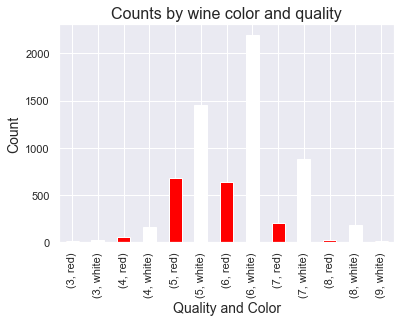

In [40]:
# counts in all columns are the same so we pick just one column, e.g., the `index`
wine_counts_by_quality_and_color = df_wine.groupby([Col.quality, Col.color]).count()['index']

wine_counts_by_quality_and_color.plot(kind='bar', color=wine_colors)
plt.title('Counts by wine color and quality', fontsize=title_font_size)
plt.xlabel('Quality and Color', fontsize=label_font_size)
plt.ylabel('Count', fontsize=label_font_size);

Because there are far more white wine than red wine samples,
it's hard to compare them directly.
Therefore, we adjust them proportionately to the total counts of red vs. white wine samples.

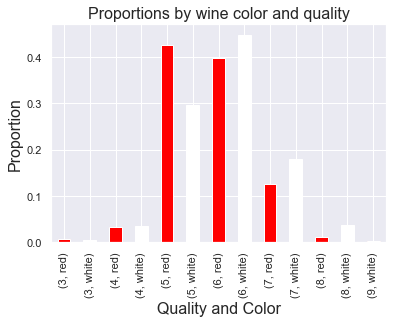

In [41]:
total_counts = df_wine.groupby(Col.color).count()['index']
wine_proportions_by_quality_and_color = wine_counts_by_quality_and_color / total_counts

wine_proportions_by_quality_and_color.plot(kind='bar', color=wine_colors)
plt.title('Proportions by wine color and quality', fontsize=title_font_size)
plt.xlabel('Quality and Color', fontsize=16)
plt.ylabel('Proportion', fontsize=16);

## Plotting with Matplotlib

### Matplotlib example

Simple example of a bar chart with matplotlib.

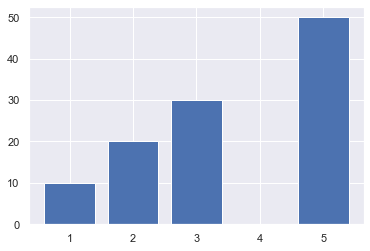

In [42]:
plt.bar([1, 2, 3, 5], [10, 20, 30, 50]);

The `x` tick labels can be specified with `plt.xticks`

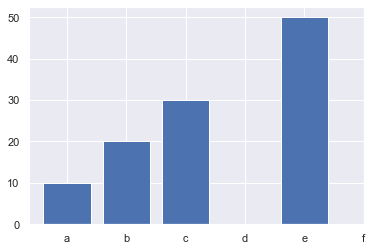

In [43]:
plt.bar([1, 2, 3, 5], [10, 20, 30, 50])
plt.xticks([1, 2, 3, 4, 5, 6], ['a', 'b', 'c', 'd', 'e', 'f']);

The `x` tick labels can also be specified directly as `plt.bar` parameter

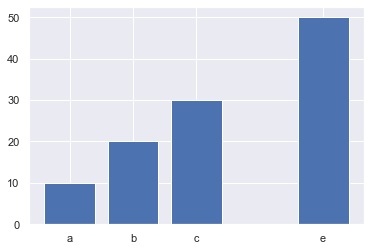

In [44]:
plt.bar([1, 2, 3, 5], [10, 20, 30, 50], tick_label=['a', 'b', 'c', 'e']);

Set the title and axis labels.

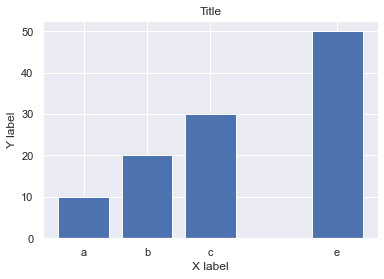

In [45]:
plt.bar([1, 2, 3, 5], [10, 20, 30, 50], tick_label=['a', 'b', 'c', 'e'])
plt.title('Title')
plt.xlabel('X label')
plt.ylabel('Y label');

### Plotting wine quality with Matplotlib

#### Do wines with higher alcohol level receive better ratings?

In [46]:
median_alcohol = df_wine[Col.alcohol].median()
median_alcohol

10.3

In [47]:
df_wine_low_alcohol = df_wine[df_wine[Col.alcohol] < median_alcohol]
df_wine_low_alcohol.shape

(3177, 15)

In [48]:
df_wine_high_alcohol = df_wine[df_wine[Col.alcohol] >= median_alcohol]
df_wine_high_alcohol.shape

(3320, 15)

In [49]:
mean_quality_low_alcohol = df_wine_low_alcohol[Col.quality].mean()
mean_quality_high_alcohol = df_wine_high_alcohol[Col.quality].mean()
(mean_quality_low_alcohol, mean_quality_high_alcohol)

(5.475920679886686, 6.146084337349397)

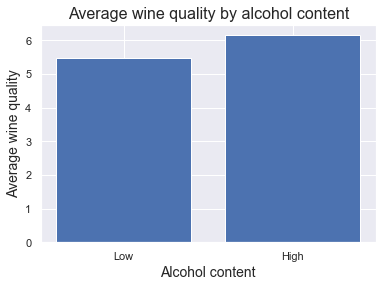

In [50]:
title_font_size = 16
label_font_size = 14

# the layout of the chart was partially taken from the lesson material
locations = [1, 2]
heights = [mean_quality_low_alcohol, mean_quality_high_alcohol]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average wine quality by alcohol content', fontsize=title_font_size)
plt.xlabel('Alcohol content', fontsize=label_font_size)
plt.ylabel('Average wine quality', fontsize=label_font_size);

#### Do sweeter wines receive better ratings?

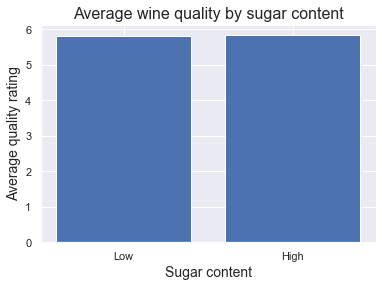

In [51]:
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average wine quality by sugar content', fontsize=title_font_size)
plt.xlabel('Sugar content', fontsize=label_font_size)
plt.ylabel('Average quality rating', fontsize=label_font_size);

#### What level of acidity (pH value) receives the highest average rating?

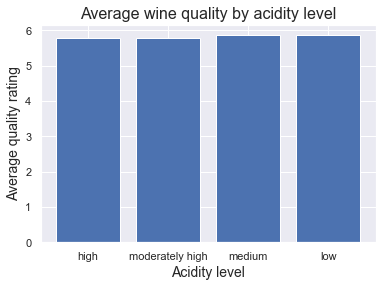

In [52]:
mean_quality_by_acidity_level = df_wine.groupby(Col.acidity_level)[Col.quality].mean()
plt.bar([1, 2, 3, 4], height=mean_quality_by_acidity_level, tick_label=mean_quality_by_acidity_level.index)
plt.title('Average wine quality by acidity level', fontsize=title_font_size)
plt.xlabel('Acidity level', fontsize=label_font_size)
plt.ylabel('Average quality rating', fontsize=label_font_size);

C:\Users\david\.conda\envs\python-examples\lib\site-packages\matplotlib\axes\_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


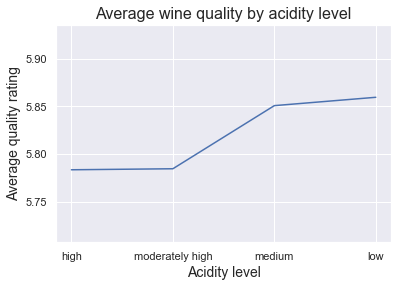

In [53]:
mean_quality_by_acidity_level = df_wine.groupby(Col.acidity_level)[Col.quality].mean()
plt.plot(mean_quality_by_acidity_level)
delta = mean_quality_by_acidity_level.max() - mean_quality_by_acidity_level.min()
plt.ylim(mean_quality_by_acidity_level.min() - delta, mean_quality_by_acidity_level.max() + delta)
plt.title('Average wine quality by acidity level', fontsize=title_font_size)
plt.xlabel('Acidity level', fontsize=label_font_size)
plt.ylabel('Average quality rating', fontsize=label_font_size);

### Plotting wine color and quality with Matplotlib

Computation and layout of the chart partially taken from the lesson material.

In [54]:
wine_color_counts = df_wine.groupby([Col.color, Col.quality]).count()['index']
wine_color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: index, dtype: int64

In [55]:
wine_color_totals = df_wine.groupby([Col.color]).count()['index']
wine_color_totals

color
red      1599
white    4898
Name: index, dtype: int64

In [56]:
wine_proportions_white = wine_color_counts[color_white] / wine_color_totals[color_white]
wine_proportions_white

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: index, dtype: float64

In [57]:
wine_proportions_red = wine_color_counts[color_red] / wine_color_totals[color_red]
wine_proportions_red[9] = 0 # arrays must have same length for plotting
wine_proportions_red

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: index, dtype: float64

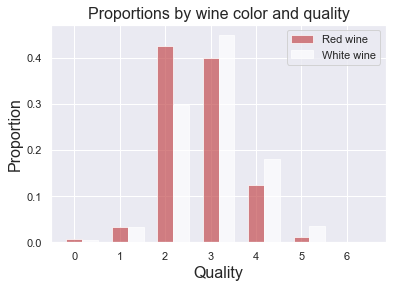

In [58]:
ind = np.arange(len(wine_proportions_white))
bar_width = 0.35
red_bars = plt.bar(ind, wine_proportions_red, bar_width, color='r', alpha=.7, label='Red wine')
white_bars = plt.bar(ind + bar_width, wine_proportions_white, bar_width, color='w', alpha=.7, label='White wine')
plt.title('Proportions by wine color and quality', fontsize=title_font_size)
plt.xlabel('Quality', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.legend();
